<a href="https://colab.research.google.com/github/parhambarazesh/PET575/blob/master/Example_temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

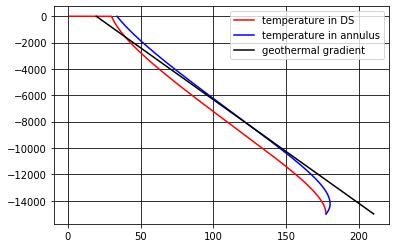

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

inch=0.08333
bbl=42

h = 15000          #well depth, feet
d_pi = 6.625       #drill string OD,inch
d_p = 6.375        #drill string ID,inch
d_bit = 8.375      #drill bit size, inch
d_ci = 10.25       #casing ID, inch
flow = 100         #circulation rate, bbl/hour
T_in = 30          #inlet drilling fluid temperature, F
mu = 110           #drilling fluid viscosity, lb/(ft-hr)
k_f = 1            #drilling fluid thermal conductivity, Btu/(ft-F-hr)
k_p = 1            #drillstring thermal conductivity, Btu/(ft-F-hr)
c_f = 0.4          #drilling fluid specific heat, Btu/(lb-F)
rho_f = 10         #drilling fluid density, lb/gal
k = 1.3            #formation thermal conductivity,Btu/(ft-F-hr)
c = 0.2            #formation specific heat, Btu/(lb-F)
rho = 165          #formation density, lb/gal
T_e = 19.5         #surface earth temperature, F
g_e = 0.0127       #geothermal gradient, F/ft
t = 44             #circulation hours

r_pi = d_pi*inch/2
r_p = d_p*inch/2
r_wb = d_bit*inch/2
r_ci = d_ci*inch/2
flow = flow*bbl

#drilling parameter calculation
A_p = np.pi*r_pi**2;                                #cross-sectional area of drillstring
N_rep = 2*r_pi*flow/A_p/mu*rho_f;                   #Reyleigh number for drilling string

A_a = np.pi*(r_wb**2-r_pi**2);                      #cross-sectional area of annulus
N_rea = 0.816*2*(r_wb-r_pi)*flow*rho_f/(A_a*mu);    # Reyleigh number annulus

N_pr = mu*c_f/k_f;                                  #Prandtl number

h_p = 0.023*N_rep**0.8*N_pr**0.4*k_f/2/r_pi;        #coefficient of heat transfer of drilling fluid in drillstring

h_a = 0.023*N_rea**0.8*N_pr**0.4*k_f/2/r_wb;        #coefficient of heat transfer of drilling fluid in annulus

U_p = (1/h_p+r_p/k_p*np.log(r_pi/r_p)+r_pi/r_p/h_a)**-1#overall coefficient of heat transfer of drilling fluid in drillstring
U_a = h_a;

alpha = k/c/rho;                                    #heat diffusivity of formation
t_D = alpha*t/r_wb**2;                               
T_D = (0.4063+0.5*np.log(t_D))*(1+0.6/t_D);         #dimensionless temperature

#model coefficients
A = 2*np.pi*r_pi*U_p/(rho_f*flow*c_f);                 
B = 2*np.pi*r_ci*U_a*k/(rho_f*flow*c_f*(k+r_ci*U_a*T_D));

theta_1 = (B+np.sqrt(B**2+4*A*B))/2;
theta_2 = (B-np.sqrt(B**2+4*A*B))/2;

C_1 = (-(T_in-T_e+g_e/A)*theta_2*np.exp(theta_2*h)-g_e)/(theta_1*np.exp(theta_1*h)-theta_2*np.exp(theta_2*h));
C_2 = ((T_in-T_e+g_e/A)*theta_1*np.exp(theta_1*h)+g_e)/(theta_1*np.exp(theta_1*h)-theta_2*np.exp(theta_2*h))


Td = np.array([1])
Ta = np.array([])
Tg = np.array([])

for x in range(0,h,1):
    Td_t = [C_1*np.exp(theta_1*x)+C_2*np.exp(theta_2*x)+g_e*x+T_e-g_e/A]
    Td=np.concatenate((Td,Td_t),axis=0)

    Ta_t = [(1+theta_1/A)*C_1*np.exp(theta_1*x)+(1+theta_2/A)*C_2*np.exp(theta_2*x)+g_e*x+T_e]
    Ta=np.concatenate((Ta,Ta_t),axis=0)

    Tg_t = [g_e*x+T_e]
    Tg=np.concatenate((Tg,Tg_t),axis=0)


plt.figure(1)
plt.plot(Td,range(-1,-len(Td)-1,-1),'r')
plt.plot(Ta,range(-1,-len(Ta)-1,-1),'b')
plt.plot(Tg,range(-1,-len(Tg)-1,-1),'k')
plt.grid(color='k')
plt.legend(('temperature in DS','temperature in annulus','geothermal gradient'))
